In [3]:
!pip install python-mnist

In [4]:

import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from mnist import MNIST
%matplotlib inline

dataFolder = MNIST('drive/My Drive/Colab Notebooks/Desktop')




Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def randInit(n_layer_units):
    g = dict()
    for i in range(len(n_layer_units)-1):
        g[f"w{i+1}"] = np.random.randn(n_layer_units[i+1],n_layer_units[i])*0.01
        g[f"b{i+1}"] = np.zeros((n_layer_units[i+1],1))
    return g

In [0]:

#print(y_train[0,1])


In [0]:
def sigmoid(z):
    
    sig = 1/(1+np.exp(-z))
    return sig

In [0]:
def sigmoidGradient(z):
    sig = sigmoid(z)*(1-sigmoid(z))
    
    return sig

In [0]:
def forwardPropagate(x,params):
    
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
 #   w3 = params["w3"]
 #   b3 = params["b3"]
    
    z1 = np.dot(w1,x) + b1
    a1 = sigmoid(z1) 
    
    z2 = np.dot(w2,a1) + b2
    a2 = sigmoid(z2)
    
    #z3 = np.dot(w3,a2) + b3
 #  a3 = sigmoid(z3)
    
    cache = {"z1":z1 ,"a1":a1 ,"z2": z2, "a2":a2 }
    
    return a2 ,cache

In [0]:
def costFunction(hx,y):
    # hx = k * m
    # y = 1 * m
    m = y.shape[1]
    y_logi = np.equal(np.tile(np.arange(10),y.T.shape),y.T).astype(int) # y_logi = m * k
    # print(y_logi.shape)
    
    cost = -(1/m)*(np.sum(np.multiply(np.log(hx).T,y_logi) + np.multiply(np.log(1-hx).T, (1-y_logi))))
    return cost

In [0]:
def backprop(params,cache,x,y):
    
    m = x.shape[1]
    
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
  #  w3 = params["w3"]
  #  b3 = params["b3"]
    
    a1 = cache["a1"]
    
    a2 = cache["a2"]
    
   # a3 = cache["a3"]
    
    y_logi = np.equal(np.tile(np.arange(10),y.T.shape),y.T).astype(int)
    
    dz2 = a2 - y_logi.T #k * m
    
    dw2 = (1/m)*np.dot(dz2,a1.T)
    
    db2 = (1/m)*np.sum(dz2,axis = 1,keepdims=True)
    
    dz1 = np.multiply(np.dot(w2.T,dz2),sigmoidGradient(cache["z1"]))
    
    dw1 = (1/m)*np.dot(dz1,x.T)
    db1 = (1/m)*np.sum(dz1,axis = 1,keepdims=True)
    
    
   # dz1 = (1/m)*np.multiply(np.dot(w2.T,dz2),sigmoidGradient(cache["z1"]))
   # dw1 = (1/m)*np.dot(dz1,x.T)
   # db1 = (1/m)*np.sum(dz1,axis = 1,keepdims=True)
    
    #assert(dw1.shape==(50,784))
    #assert(dw2.shape==(40,50))
    #assert(dw3.shape==(10,40))
    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2 }
    return grads
    

In [0]:
def update_params(params,grads,alpha=1.5) :
    
    w1 = params["w1"]
    w2 = params["w2"]
#    w3 = params["w3"]
    b1 = params["b1"]
    b2 = params["b2"]
 #   b3 = params["b3"]
    
    
    dw1 = grads["dw1"]
    dw2 = grads["dw2"]
  #  dw3 = grads["dw3"]
    db1 = grads["db1"]
    db2 = grads["db2"]
   # db3 = grads["db3"]
    
    w1 =w1- alpha*dw1
    w2 =w2- alpha*dw2
    #w3 =w3- alpha*dw3
    b1 =b1- alpha*db1
    b2 =b2- alpha*db2
   # b3 =b3- alpha*db3
    
    params = {"w1": w1,
             "b1": b1,
             "w2": w2,
             "b2": b2 }
    return params
    

In [0]:
def nn_model(x, y, maxIter = 600):
    
    np.random.seed(4)
    
    params = randInit([784,25,10])
    
    for i in range(maxIter):
        
        hx,cache = forwardPropagate(x,params)
        
        cost = costFunction(hx,y)
        
        grads = backprop(params,cache,x,y)
        
        params = update_params(params,grads)
        
        if i%100 ==0:
          print(f"Cost after {i} iterations : {cost}")
    return params
    
    

In [0]:
def predict(x,params):
    
    hx,cache = forwardPropagate(x,params)
    
    p = np.where(hx == np.amax(hx))[0][0]
    return p  

In [0]:
x_train , y_train= dataFolder.load_training()
x_train = np.array(x_train).T/255
y_train = np.array(y_train).reshape(1,60000)
x_t,y_t = dataFolder.load_testing()
x_test = np.array(x_t).T/255
y_test = np.array(y_t).reshape(1,10000)
#print(np.amax(x_train,axis=0))

In [16]:
para = nn_model(x_train,y_train)

Cost after 0 iterations : 6.907277287479081
Cost after 100 iterations : 1.1475502856422597
Cost after 200 iterations : 0.6923527671399826
Cost after 300 iterations : 0.5707245522311886
Cost after 400 iterations : 0.5089362793372132
Cost after 500 iterations : 0.4691637070344942


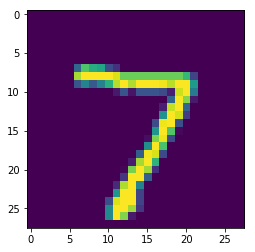

7


In [21]:

plt.imshow(np.reshape(x_test[:,0],(28,28)))
plt.show()
p = predict(x_test[:,0].reshape(784,1),para)
print(p)
np.save('exe',para)
from google.colab import files